In [1]:
#BMI sample data 생성
import random

#BMI 계산 후 레이블 리턴
def calc_bmi(h,w):
    bmi=w/(h/100)**2
    if bmi < 18.5: return "thin"
    if bmi < 25 : return "normal"
    else : return "fat"

#출력파일 준비
fp=open("bmi.csv", "w", encoding='utf-8')
fp.write("height,weight,label\r\n")

#무작위 데이터 생성
cnt={"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h=random.randint(120,200)
    w=random.randint(35,80)
    label=calc_bmi(h,w)
    cnt[label]+=1 #label = thin, normal, fat 등
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
    
fp.close()
print("ok",cnt) 


ok {'thin': 6276, 'normal': 6019, 'fat': 7705}


In [2]:
#bmi.csv data로 svm 분류
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import time
start_time=time.time()


#키와 몸무게 데이터 읽어들이기
df=pd.read_csv("bmi.csv")

#칼럼을 자르고 정규화하기
label=df["label"]
w=df["weight"]
h=df["height"]
wh=pd.concat([w,h],axis=1) #데이터프레임 합치기 ###정규화가 어디서 일어난거?

#학습 전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(wh,label)

#데이터 학습하기
clf=svm.SVC() #support vector classification
clf.fit(data_train, label_train)

#데이터 예측하기
predict=clf.predict(data_test)

#결과 테스트하기 
ac_score=metrics.accuracy_score(label_test, predict)
cl_report=metrics.classification_report(label_test, predict)
print("정답률=", ac_score)
print("리포트=\n", cl_report)


#시간종료코드
print("start_time", start_time) 
print("--- %s seconds ---" %(time.time() - start_time))

정답률= 1.0
리포트=
              precision    recall  f1-score   support

        fat       1.00      1.00      1.00      1964
     normal       1.00      1.00      1.00      1502
       thin       1.00      1.00      1.00      1534

avg / total       1.00      1.00      1.00      5000

start_time 1540887410.141516
--- 8.042210102081299 seconds ---


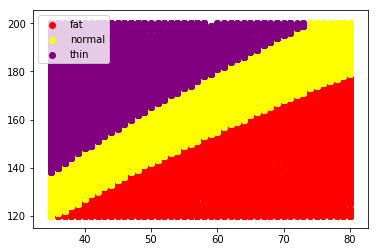

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

#csv load
df=pd.read_csv("bmi.csv", index_col=2)

#그래프 그리기 시작
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

#서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b=df.loc[lbl]
    ax.scatter(b["weight"], b["height"],c=color, label=lbl)
    
scatter("fat","red")
scatter("normal","yellow")
scatter("thin", "purple")

ax.legend()
plt.savefig("bmi-test.png")
plt.show()